# Obtain ground truth params for test datasets

Convenience notebook for creating ground truth parameters for test datasets.

In [1]:
from pathlib import Path

from multiview_stitcher._tests import test_bench
from multiview_stitcher import vis_utils, io

import dask.diagnostics

import importlib
importlib.reload(test_bench)

<module 'multiview_stitcher._tests.test_bench' from '/Users/malbert/software/multiview-stitcher/src/multiview_stitcher/_tests/test_bench.py'>

/Users/malbert/software/multiview-stitcher/image-datasets/test_bench_data


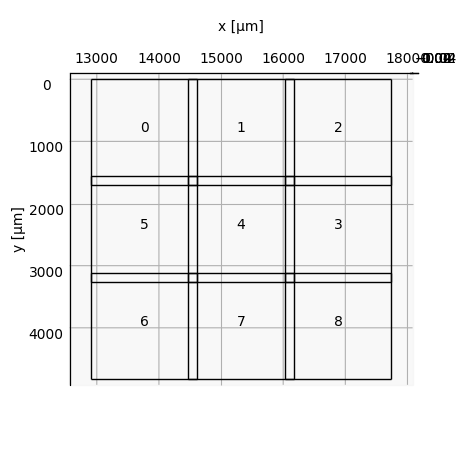

(<Figure size 640x480 with 1 Axes>, <Axes3D: ylabel='x [μm]', zlabel='y [μm]'>)

In [9]:
print(test_bench.test_bench_data_dir)

dataset = test_bench.datasets[2]
msims = test_bench.get_msims_from_dataset(dataset)

vis_utils.plot_positions(msims, io.METADATA_TRANSFORM_KEY, use_positional_colors=False)

## Registration

In [10]:
with dask.diagnostics.ProgressBar():
    params = test_bench.register_dataset(msims, dataset)

[########################################] | 100% Completed | 1.58 ss
[########################################] | 100% Completed | 5.12 sms


## Visualization

In [7]:
# napari

from napari_stitcher import viewer_utils
import napari

viewer = napari.Viewer(ndisplay=2)
lds = viewer_utils.create_image_layer_tuples_from_msims(
    msims,
    transform_key='reg_0',
    n_colors=4,
    # contrast_limits=[0, 1000],
    )
viewer_utils.add_image_layer_tuples_to_viewer(viewer, lds, manage_viewer_transformations=True)
viewer.reset_view()
    

In [ ]:
# # neuroglancer

# # doesn't work if time dimension is present

# from multiview_stitcher import vis_utils, ngff_utils, msi_utils
# import importlib
# importlib.reload(vis_utils)

# import tempfile

# with tempfile.TemporaryDirectory() as tmp_dir:

#     tmp_dir = Path(tmp_dir)

#     zarr_paths = [tmp_dir / f"sim_{imsim}.zarr" for imsim, msim in enumerate(msims)]

#     sims = [msi_utils.get_sim_from_msim(msim) for msim in msims]

#     for imsim, msim in enumerate(msims):
#         ngff_utils.write_sim_to_ome_zarr(
#             msi_utils.get_sim_from_msim(msim),
#             zarr_paths[imsim], overwrite=False)

#     # sims = [ngff_utils.write_sim_to_ome_zarr(
#     #     msi_utils.get_sim_from_msim(msim),
#     #     zarr_paths[imsim], overwrite=False) for imsim, msim in enumerate(msims)]

#     vis_utils.view_neuroglancer(
#         sims,
#         ome_zarr_paths=zarr_paths,
#         # channel_coord='DAPI',
#         transform_key="registered",
#         # single_layer=False,
#     )

## Save parameters

In [11]:
test_bench.write_params(params, dataset["parameter_path"])